In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 넘파이, 시각화, 통계
- 평가일 : 24.1.22
- 성명 : 김신미
- 점수 :

Q1. array2d에서 슬라이싱을 사용해서 아래와 같이 출력하세요.

array2d = np.arange(1,10).reshape(3,3)

In [ ]:
[[1 2 3]
[4 5 6]
[7 8 9]]

[[2 3]
[5 6]]

[1 4]

In [ ]:
# [정답풀이]

import numpy as np

array2d = np.arange(1,10).reshape(3,3)
array2d_1 = array2d[:2,1:3]
array2d_2 = array2d[:2,:1].reshape(-1)              # 2차원의 [[1][4]] 행렬을 뽑아, 행과 열을 전환하여 1차원 행렬로 변경

print(array2d,'\n')
print(array2d_1,'\n')
print(array2d_2)


[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[2 3]
 [5 6]] 

[1 4]


Q2. 1 ~ 100까지 정수에서 5의 배수이면서 2의 배수인 것만을 출력(for문과 배열 두가지 방식)

In [ ]:
import numpy as np

list_for = []
list_array = []

for i in range(1, 101):
  if (i % 5 == 0) & (i % 2 == 0):
    list_for.append(i)

print("for문 사용 :", list_for)


array = np.arange(1, 101)
list_array = array[(array % 2 == 0) & (array % 5 == 0)]

print("배열 사용 :", list_array,"\n")


for문 사용 : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
배열 사용 : [ 10  20  30  40  50  60  70  80  90 100] 



Q3. 주가데이터.csv를 불러와서 다음을 수행하세요.
- 아래 df에서 Close 칼럼을 Box Plot으로 표현하세요
- df Close 칼럼의 값에서 이상치로 의심할 수 있는 관측치를 출력하세요.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/KITA_OCR과정/m3_분석라이브러리/visualization/datas/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.describe()

,Close,Start,High,Low,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,11662.500000,11755.000000,12015.000000,11374.500000,158014.150000
std,927.060294,865.250192,907.729962,884.369981,134473.512003
min,10100.000000,10550.000000,10900.000000,9990.000000,25171.000000
25%,11087.500000,11125.000000,11350.000000,10737.500000,58323.250000
50%,11725.000000,11800.000000,12025.000000,11500.000000,134176.500000
75%,11962.500000,12050.000000,12262.500000,11912.500000,185836.000000
max,13450.000000,13600.000000,13700.000000,13150.000000,558148.000000


이상치 예측:
           Date  Close  Start   High    Low  Volume
11  2018-06-15  13400  13600  13600  12900  201376
12  2018-06-14  13450  13200  13700  13150  347451 



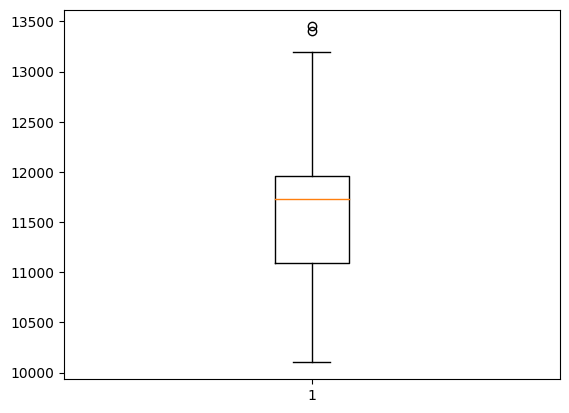

In [ ]:
import matplotlib.pyplot as plt

chk_Q1 = df['Close'].describe()['25%']       # Q1 = df.Close.quantile(0.25)도 됨.
chk_Q3 = df['Close'].describe()['75%']       # Q3 = df.Close.quantile(0.75)도 됨.
IQR = chk_Q3 - chk_Q1

result = df[(df['Close'] < chk_Q1 - 1.5 * IQR) | (df['Close'] > chk_Q3 + 1.5 * IQR)]

plt.boxplot(df['Close'])
print("이상치 예측:\n", result, '\n')

Q4. fish_multi A, B 그룹에 이상치를 10, 2를 추가한 후 Box Plot을 그리고 이상치를 구하세요.


In [ ]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/KITA_OCR과정/m3_분석라이브러리/visualization/datas/4_fm2.csv')
fish_multi            # 0~9행의 데이터는 species = A / 10~19행의 데이터는 species = B

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


[ 이상치 예측 for A ]
   species  length
5       A      10 

[ 이상치 예측 for B ]
    species  length
10       B       2 



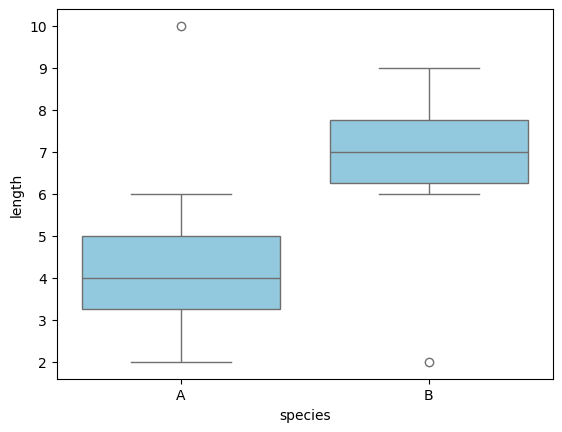

In [ ]:
import seaborn as sns           # boxplot() 사용을 위해 seaborn 라이브러리 import

fish_multi.iloc[5,1] = 10       # A에 인위적으로 이상치를 추가
fish_multi.iloc[10,1] = 2       # B에 인위적으로 이상치를 추가

fish_multi.groupby('species').describe()                                    # 'species' 컬럼을 그룹화
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')      # 그룹화한 컬럼 2개를 boxplot으로 표현


for val in fish_multi['species'].unique():    #unique 특정열의 모든 고유 값을 반환
  group = fish_multi[fish_multi['species'] == val]

  chk_Q1 = group['length'].quantile(0.25)
  chk_Q3 = group['length'].quantile(0.75)
  IQR = chk_Q3 - chk_Q1

  result = group[(group['length'] < chk_Q1 - 1.5 * IQR) | (group['length'] > chk_Q3 + 1.5 * IQR)]
  print(f"[ 이상치 예측 for {val} ]\n {result} \n")


Q5. 적절한 데이터를 생성하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

<BarContainer object of 10 artists>

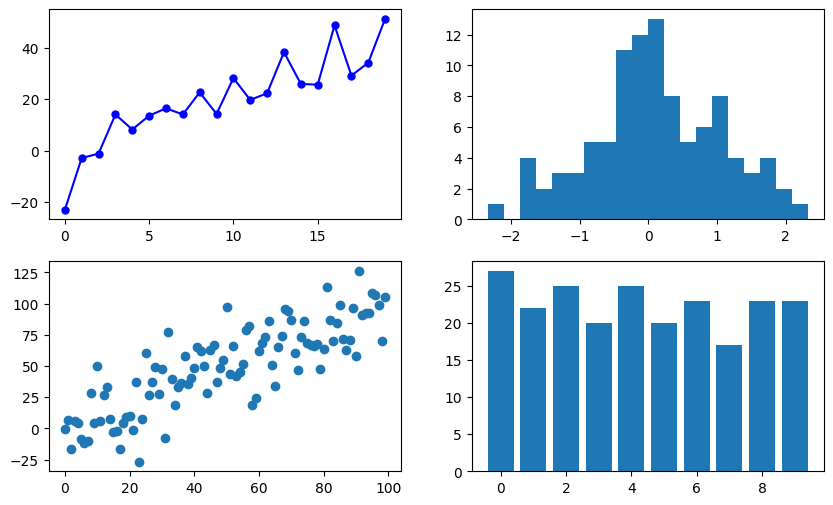

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))

sec1 = fig.add_subplot(2,2,1)
sec1.plot(np.arange(20), (np.arange(20)*2 + np.random.randn(20)*10), color='blue', marker='o', markersize=5)

sec2 = fig.add_subplot(2,2,2)
sec2.hist(np.random.randn(100), bins=20)

sec3 = fig.add_subplot(2,2,3)
sec3.scatter(x = np.arange(100), y = np.arange(100)+np.random.randn(100)*20)

sec4 = fig.add_subplot(2,2,4)
sec4.bar(np.arange(10), np.random.randint(15,30,10))



Q6. 정규 분포를 따르는 아래 데이터를 생성한 후 과제를 수행하세요.

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)

- 생성된 데이터를 사용하여 히스토그램 작성
- 히스토그램의 빈(bin) 수를 조정해서 작성
- 두개의 그래프를 1행 2열로 표현

(array([  1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   4.,   2.,   0.,
          1.,   1.,   1.,   2.,   1.,   1.,   2.,   2.,   6.,   6.,   6.,
          8.,   9.,   5.,   5.,   3.,  13.,  11.,  16.,   9.,  16.,  13.,
         14.,  18.,  14.,  17.,  18.,  20.,  27.,  23.,  33.,  34.,  32.,
         45.,  57.,  51.,  56.,  61.,  67.,  60.,  69.,  68.,  76.,  82.,
         75.,  84.,  90.,  92., 110.,  87.,  98., 109., 133., 120., 104.,
        119., 130., 143., 135., 168., 143., 144., 157., 161., 181., 164.,
        166., 157., 183., 161., 166., 168., 186., 191., 189., 202., 178.,
        174., 174., 159., 156., 150., 157., 149., 161., 152., 162., 127.,
        133., 121., 132., 137., 147., 120., 100., 118., 104.,  91.,  96.,
         62.,  98.,  87.,  57.,  55.,  68.,  56.,  59.,  59.,  41.,  48.,
         44.,  43.,  35.,  35.,  25.,  35.,  27.,  27.,  26.,  23.,  16.,
         18.,  23.,  14.,   9.,  12.,   3.,   9.,  12.,   8.,   7.,   9.,
          6.,   7.,   5.,   4.,   2., 

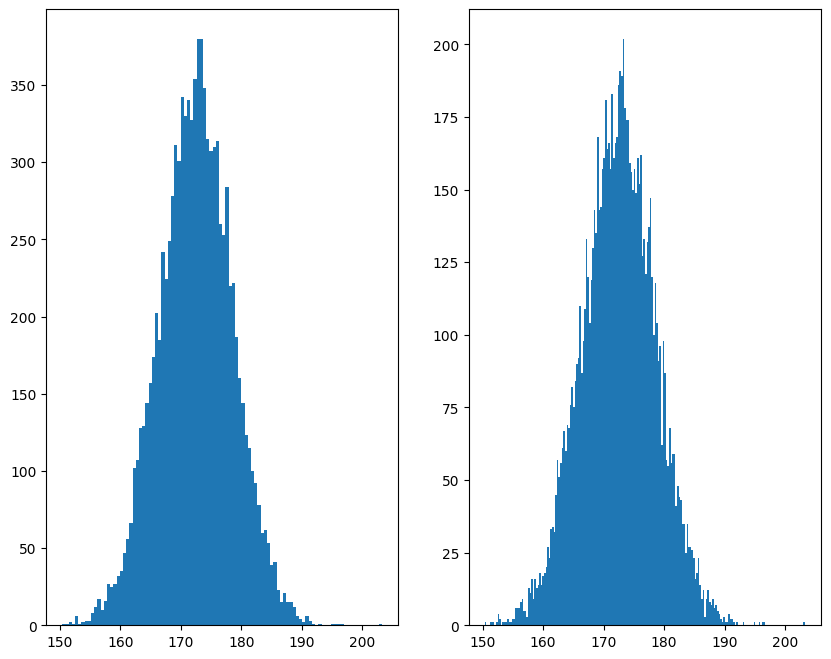

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)     # loc:평균 / scale:표준편차 / size:샘플수

fig, axes = plt.subplots(1,2, figsize=(10,8))

axes[0].hist(data, bins=100)
axes[1].hist(data, bins=200)


Q7. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [ ]:
datas = [4, 8, 15, 16, 23, 42]

print("[원본] 평균값 :", np.mean(datas), " / 중앙값 :", np.median(datas))

datas_1 = np.append(datas, [-100, 100])
print("[수정] 평균값 :", np.mean(datas_1), " / 중앙값 :", np.median(datas_1), '\n')


[원본] 평균값 : 18.0  / 중앙값 : 15.5
[수정] 평균값 : 13.5  / 중앙값 : 15.5 



Q8. 아래 두개의 데이터로 공분산(covariance)과 상관계수를 계산하세요.
- data1 = [65, 72, 78, 65, 72, 70, 65, 68]
- data2 = [72, 69, 74, 66, 70, 75, 65, 72]

In [ ]:
data1 = np.array([65, 72, 78, 65, 72, 70, 65, 68])
data2 = np.array([72, 69, 74, 66, 70, 75, 65, 72])

print("공분산 :", np.cov(data1, data2, ddof=0)[0,1])
print("상관계수 :", np.corrcoef(data1, data2)[0,1])

공분산 : 7.859375
상관계수 : 0.5453950193321363


Q9. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [ ]:
data = np.arange(1000)


quar = np.percentile(data, [25, 50, 75])
print(quar)

pct_10 = np.percentile(data, 10)
pct_90 = np.percentile(data, 90)

print("10번째 백분위수 :", pct_10, " / 90번째 백분위 수 :", pct_90)

[249.75 499.5  749.25]
10번째 백분위수 : 99.9  / 90번째 백분위 수 : 899.1


Q10. Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화하세요.(평균이 0이고 분산이 1이 되도록 특성의 크기를 조정)
- data = np.array([[1], [2], [3], [4], [5]])

In [ ]:
data = np.array([[1],[2],[3],[4],[5]])          # data = np.arange(1,6).reshape(-1,1) 와 동일

z_data = (data - np.mean(data)) / np.std(data)
z_data

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])